<a href="https://colab.research.google.com/github/MAPLE0934/Wine_Quality_Predictor/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('wine.csv')
df.head()

Saving wine.csv to wine.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.info()
df.describe()

Shape: (1599, 12)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH               

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


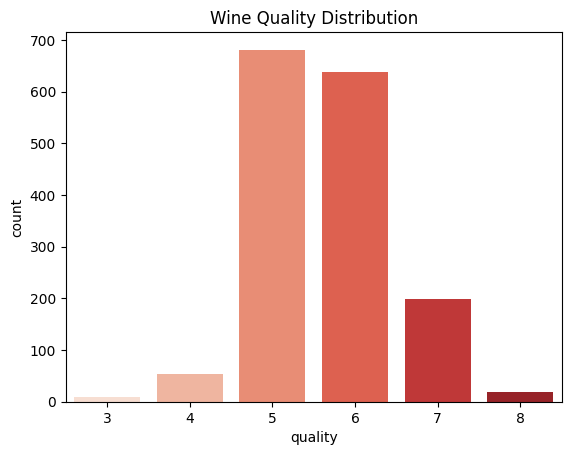

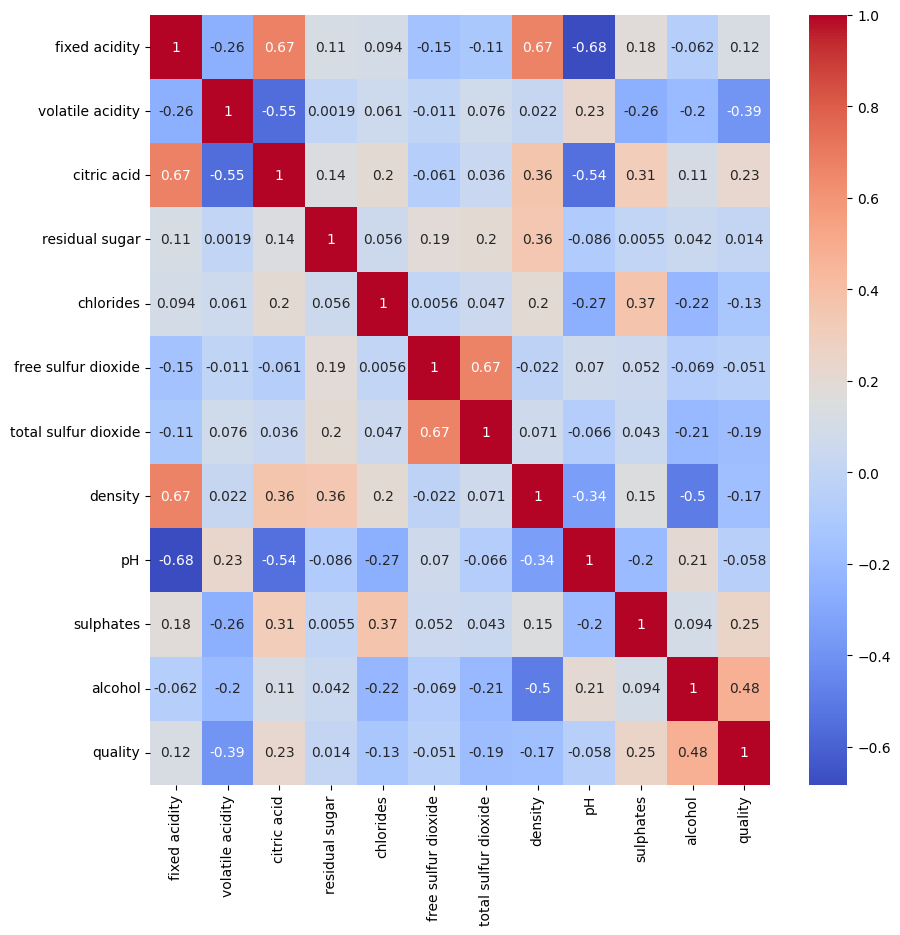

In [8]:
# Ploting distribution of wine quality
sns.countplot(data=df, x='quality', palette='Reds')
plt.title("Wine Quality Distribution")
plt.show()

# Correltion heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Define features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Log transform target (optional based on skew)
# y = np.log(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df

,Model,R2 Score,MAE,RMSE
3,Random Forest,0.449296,0.443062,0.590897
4,Gradient Boosting,0.391431,0.491837,0.621166
5,XGBoost,0.356756,0.446221,0.638617
1,Ridge,0.351407,0.513413,0.641267
0,Linear Regression,0.351389,0.513396,0.641276
2,Lasso,-0.003450,0.677943,0.797628


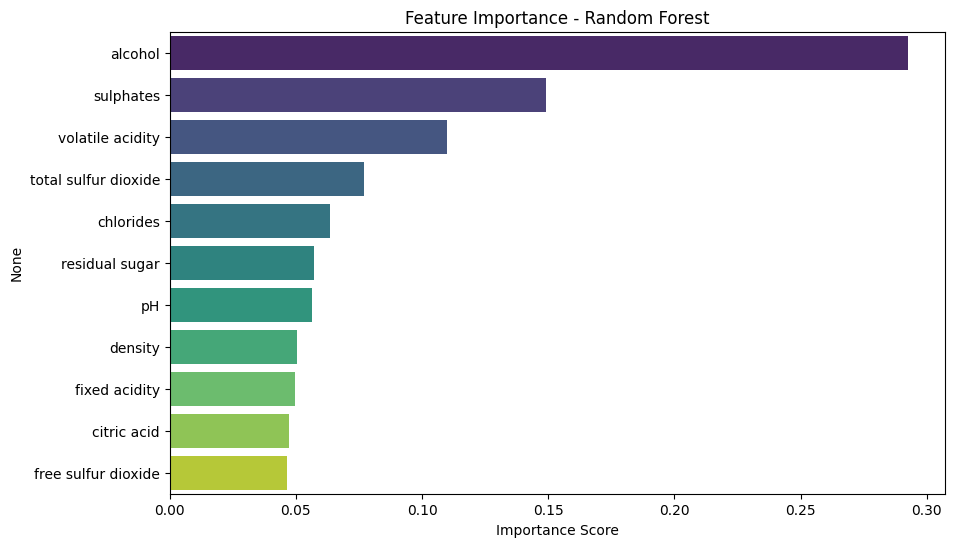

In [11]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

importances = best_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae, 'RMSE': rmse})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

               Model  R2 Score       MAE      RMSE
3      Random Forest  0.449296  0.443062  0.590897
4  Gradient Boosting  0.391431  0.491837  0.621166
5            XGBoost  0.356756  0.446221  0.638617
1              Ridge  0.351407  0.513413  0.641267
0  Linear Regression  0.351389  0.513396  0.641276
2              Lasso -0.003450  0.677943  0.797628


Accuracy: 96.2500


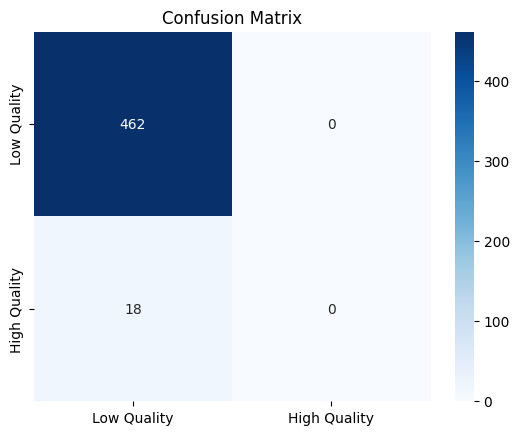

Classification Report:
              precision    recall  f1-score   support

high quality       0.96      1.00      0.98       462
 low quality       0.00      0.00      0.00        18

    accuracy                           0.96       480
   macro avg       0.48      0.50      0.49       480
weighted avg       0.93      0.96      0.94       480



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set threshold for classification
threshold = 5
# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Convert predictions into "high quality" or "low quality" based on the threshold
y_pred_labels = ['high quality' if score >= threshold else 'low quality' for score in y_pred]

# Convert true values to labels for classification comparison
y_test_labels = ['high quality' if score >= threshold else 'low quality' for score in y_test]

# Classification Metrics (Accuracy, Confusion Matrix)
accuracy = accuracy_score(y_test_labels, y_pred_labels)*100
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'], yticklabels=['Low Quality', 'High Quality'])
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test_labels, y_pred_labels)
print('Classification Report:')
print(class_report)